In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cookie_cats.csv')

In [3]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
data.shape

(90189, 5)

In [5]:
data.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [6]:
data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

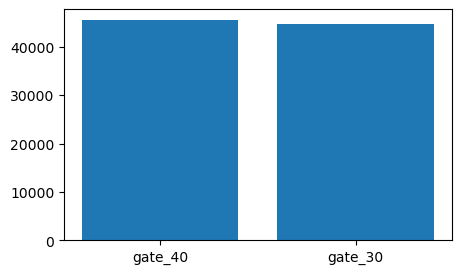

In [7]:
## Distribution of users
df0 = data['version'].value_counts().to_frame('user_count').reset_index().rename(columns = {'index': 'version'})
fig = plt.figure(figsize = (5, 3))
plt.bar(df0['version'], df0['user_count'])
plt.show()

In [8]:
data['sum_gamerounds'] = data['sum_gamerounds'].astype('int')

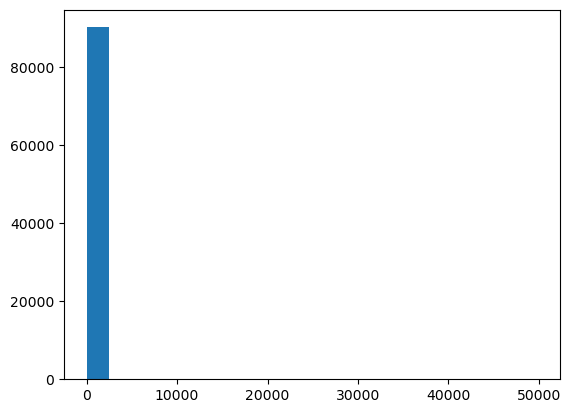

In [9]:
## Distribution of game rounds
plt.hist(data['sum_gamerounds'],  bins=20)
plt.show()

In [10]:
data['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

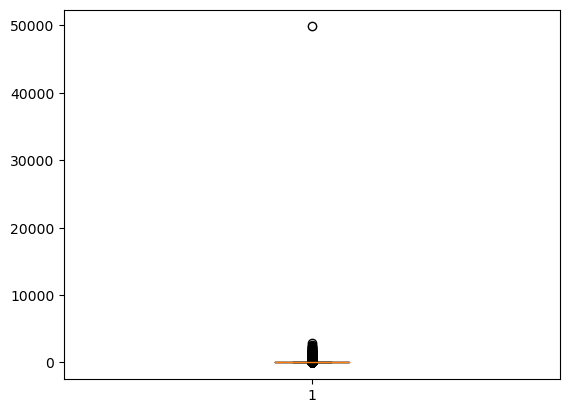

In [11]:
## Checking outliers in gamerounds
plt.boxplot(data['sum_gamerounds'])
plt.show()

In [12]:
data = data[data['sum_gamerounds'] < 10000]

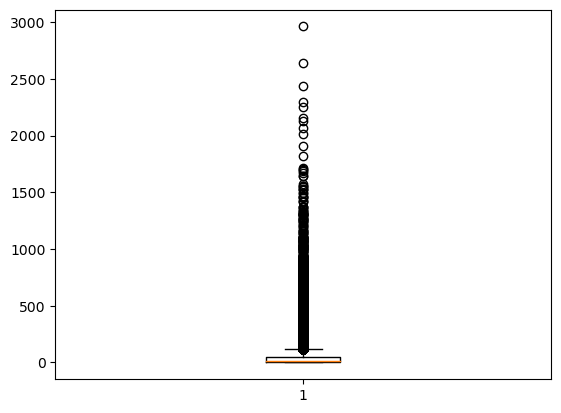

In [13]:
## Checking outliers in gamerounds
plt.boxplot(data['sum_gamerounds'])
plt.show()

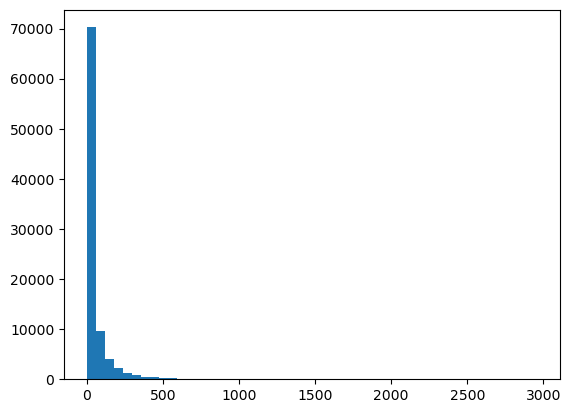

In [14]:
## Distribution of game rounds
plt.hist(data['sum_gamerounds'],  bins=50)
plt.show()

In [15]:
data['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [16]:
# 50% of the users have played less than 16 rounds within 1 week of installation 
# 75% of the users have played less than 50 rounds within 1 week of installation

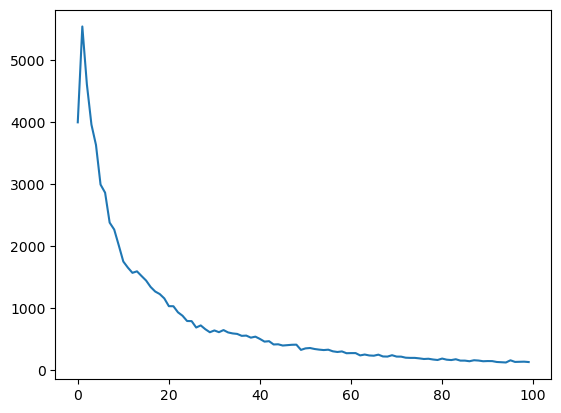

In [17]:
dist_rounds = data.groupby(by = ['sum_gamerounds'])['userid'].count().to_frame('count_users').reset_index().sort_values(by = 'sum_gamerounds', ascending = True)[:100]
plt.plot(dist_rounds['sum_gamerounds'], dist_rounds['count_users'])
plt.show()

In [18]:
dist_rounds.head(10)

,sum_gamerounds,count_users
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [19]:
(5538/data.shape[0])*100

6.1405064975384755

In [20]:
## 4.4% of the users haven't played after installation of the game 
## Max users have played a single round after installation i.e. 6.14% of the users have played 1 round after installation  

In [21]:
# Checking the overall retention rate for the game
print('1 day retention rate is:',round((data['retention_1'].mean())*100,2), '%')
print('7 day retention rate is:',round((data['retention_7'].mean())*100,2), '%')

1 day retention rate is: 44.52 %
7 day retention rate is: 18.61 %


In [22]:
# Checking the retention rate for control and treatment group 
data.groupby(by = ['version'])[['retention_1','retention_7']].mean()

,retention_1,retention_7
version,,
gate_30,0.448198,0.190183
gate_40,0.442283,0.182000


In [23]:
## 1 day retention is same across both the groups 
## 7 day retention is higher for the control group.
## Hypothesis: When the gate is on a higher level, the 7 day retention rates drop

In [24]:
# Checking impact on number of rounds played by the users

In [25]:
c_df = data[data['version'] == 'gate_30']
trt_df = data[data['version'] == 'gate_40']

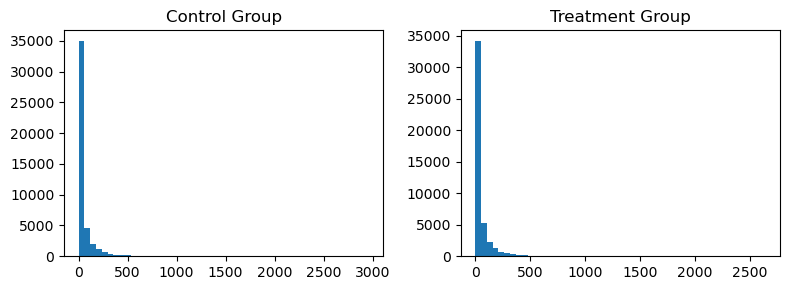

In [26]:
fig, axes = plt.subplots(1,2, figsize = (8,3))

axes[0].hist(c_df['sum_gamerounds'],  bins=50)
axes[0].set_title('Control Group')

axes[1].hist(trt_df['sum_gamerounds'],  bins=50)
axes[1].set_title('Treatment Group')

plt.tight_layout()
plt.show()

In [27]:
c_df_dist = c_df.groupby(by = 'sum_gamerounds')['userid'].count().to_frame('count_users').reset_index()

In [28]:
trt_df_dist = trt_df.groupby(by = 'sum_gamerounds')['userid'].count().to_frame('count_users').reset_index()

In [29]:
c_df['sum_gamerounds'].describe()

count    44699.000000
mean        51.342111
std        102.057598
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [30]:
trt_df['sum_gamerounds'].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

In [31]:
# Since about 75% of the users play less than 50 rounds in each group. Let's look at the distribution of users 
# playing first 50 rounds.

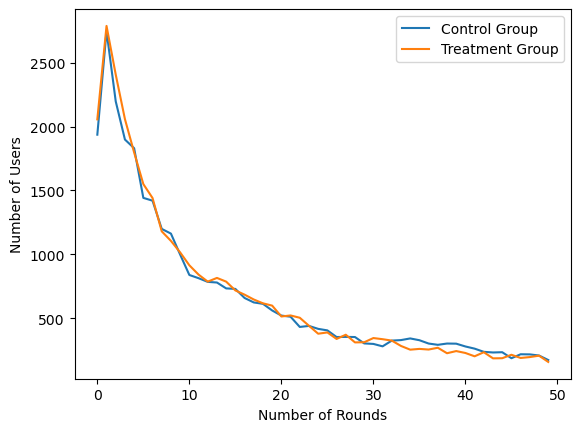

In [32]:
c_df_dist = c_df_dist[:50]
trt_df_dist = trt_df_dist[:50]
plt.plot(c_df_dist['sum_gamerounds'],c_df_dist['count_users'], label='Control Group')
plt.plot(trt_df_dist['sum_gamerounds'],trt_df_dist['count_users'], label='Treatment Group')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

In [33]:
## The distribution of users across different number of rounds is similar between the two groups.
## However, after 30 rounds, the control group has higher number of users compared to the treatment group.
## At level 30, users have the ability to make in app purchases, therefore for more than 30 rounds, we see a 
## larger number of users in the control group than the treatment group

In [34]:
# A/B Testing

In [35]:
## Impact on 1 day retention rate

In [36]:
b_list = []
for i in range(1000):
    sample = data.sample(frac=1, replace=True).groupby(by = 'version')['retention_1'].mean()
    b_list.append(sample)

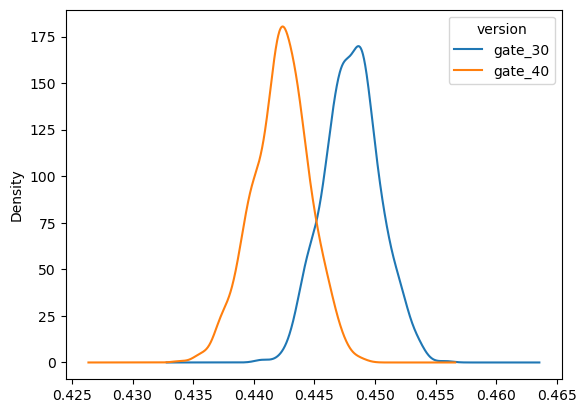

In [37]:
b_df1 = pd.DataFrame(b_list)
b_df1.plot(kind = 'density')
plt.show()

In [38]:
## There appears to be a difference in the 1 day retention between the control and treatmetn groups

Text(0.5, 1.0, '% difference of 1 day retention rate btw control & treatment groups')

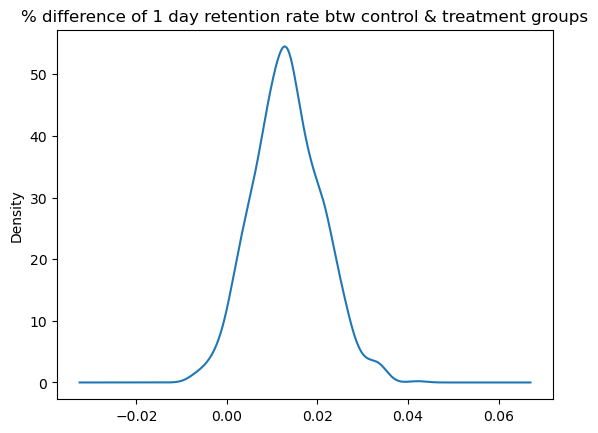

In [39]:
## Plotting the difference between the control and treatment group 

b_df1['percent_diff'] = (b_df1['gate_30'] - b_df1['gate_40'])/ b_df1['gate_40']
ax = b_df1['percent_diff'].plot(kind = 'density')
ax.set_title('% difference of 1 day retention rate btw control & treatment groups')


In [40]:
## mean % difference in the retention rates between the control and treatment group
b_df1['percent_diff'].mean()

0.013309694142023536

In [41]:
## The mean % difference between the two groups is > 0. There exists a difference in the 1 Day retention rates between
## the control & treatment group.

In [42]:
## Checking the statistical significance in the 1 day retention rates using statistical tests

In [43]:
## Shapiro-Wilk test to check for the normality of the distribution

In [44]:
from scipy.stats import shapiro
import seaborn as sns

c_means = b_df1['gate_30']
trt_means = b_df1['gate_40']

# checking normality for control group 
stat, p_value1 = shapiro(c_means)

# checking normality for treatment group
stat, p_value2 = shapiro(trt_means)

if p_value1 < 0.05:
    print('Control group retention rate is not normally distributed')
else:
    print('Control group retention rate is normally distributed')
    
if p_value2 < 0.05:
    print('Treatment group retention rate is not normally distributed')
else:
    print('Treatment group retention rate is normally distributed')

Control group retention rate is normally distributed
Treatment group retention rate is normally distributed


In [45]:
## Plotting Q-Q plots for visualizing the normal distribution of means

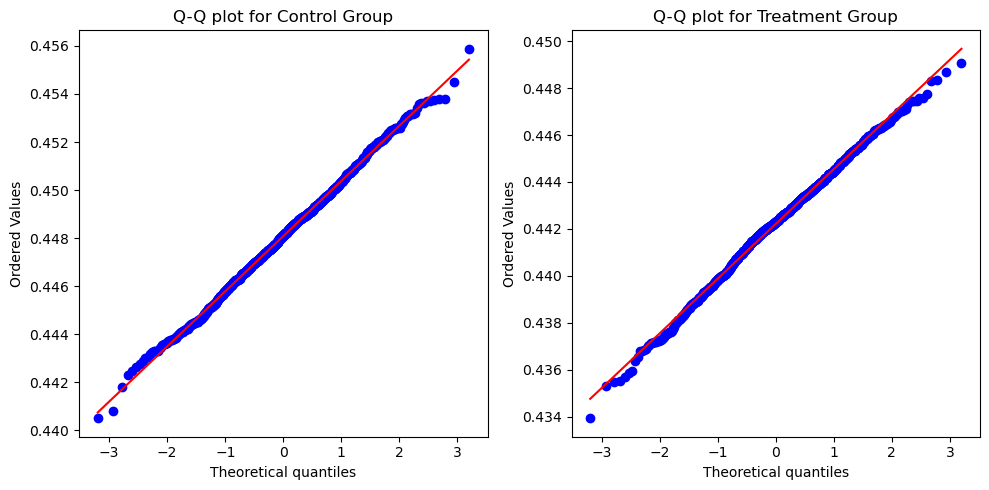

In [46]:
import scipy.stats as stats

fig, axes = plt.subplots(1,2, figsize = (10,5))
stats.probplot(c_means, dist = 'norm', plot = axes[0])
axes[0].set_title("Q-Q plot for Control Group")

stats.probplot(trt_means, dist = 'norm', plot = axes[1])
axes[1].set_title("Q-Q plot for Treatment Group")
plt.tight_layout()
plt.show()

In [47]:
## Levene's test to check for similarity of variances

In [48]:
from scipy.stats import levene
stat, p_value = levene(c_means, trt_means)
if p_value < 0.05:
    print('The variances of control and treatment group are different')
else:
    print('The variances of control and treatment group are similar')

The variances of control and treatment group are similar


In [49]:
## Calculating test statistic and checking for significance

In [50]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(c_means, trt_means)
if p_value < 0.05:
    print('The 1 day retention rate is different for control and treatment groups')
else:
    print('The 1 day retention rate is similar between control and treatment groups')

The 1 day retention rate is different for control and treatment groups


In [51]:
## Therefore, we can conclude that the increasing the level to enable purchasing in the mobile game, 
## negatively impacts 1 day user retention